In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

Sources

1. https://www.datacamp.com/community/tutorials/introduction-factor-analysis
2. https://buildmedia.readthedocs.org/media/pdf/factor-analyzer/latest/factor-analyzer.pdf

# Prepare dataframe

In [2]:
base_dir = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(base_dir, 'Data', 'post_convo_survey',
                              'friends', 'clean_data.csv'))


In [3]:
df.head()

,subID,partnerID,convo_flow,convo_enjoy,speak,common,similar,attractive,attracted_to,extraverted,...,comfortable,extraverted_self,fun_self,disclosed_self,comfortable_self,friends_years,friends_years_extended,friends_talk,friends_nature,gender
0,25,201,69,80,49,66,74,75,11,68,...,92,68,81,34,95,3.5,NaN,91,95,1
1,201,25,83,85,62,89,62,98,85,69,...,90,76,68,67,93,3.5,NaN,95,75,1
2,30,202,96,97,58,95,100,86,60,92,...,84,94,75,73,88,1.5,NaN,100,91,1
3,202,30,77,82,50,76,31,74,75,68,...,85,67,73,69,75,1.6,NaN,73,67,2
4,101,203,92,99,56,62,78,80,26,59,...,74,44,65,36,84,1.0,NaN,51,52,2


In [4]:
df.columns

Index(['subID', 'partnerID', 'convo_flow', 'convo_enjoy', 'speak', 'common',
       'similar', 'attractive', 'attracted_to', 'extraverted', 'fun',
       'disclosed', 'comfortable', 'extraverted_self', 'fun_self',
       'disclosed_self', 'comfortable_self', 'friends_years',
       'friends_years_extended', 'friends_talk', 'friends_nature', 'gender'],
      dtype='object')

In [5]:
df.drop(['friends_years_extended', 'gender',
        'subID', 'partnerID'],axis=1,inplace=True)

In [6]:
df.head()

,convo_flow,convo_enjoy,speak,common,similar,attractive,attracted_to,extraverted,fun,disclosed,comfortable,extraverted_self,fun_self,disclosed_self,comfortable_self,friends_years,friends_talk,friends_nature
0,69,80,49,66,74,75,11,68,89,89,92,68,81,34,95,3.5,91,95
1,83,85,62,89,62,98,85,69,88,17,90,76,68,67,93,3.5,95,75
2,96,97,58,95,100,86,60,92,97,64,84,94,75,73,88,1.5,100,91
3,77,82,50,76,31,74,75,68,68,64,85,67,73,69,75,1.6,73,67
4,92,99,56,62,78,80,26,59,80,42,74,44,65,36,84,1.0,51,52


# Adequacy Test

- Bartlett should be sig
- KMO should be greater than .6

In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(1177.280426687862, 7.000657862210603e-158)

In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7393029309077818

# Choose number of factors

In [9]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev

array([5.60504498, 2.04921   , 1.76478082, 1.41959996, 1.18042151,
       1.09061222, 0.91448982, 0.88353594, 0.57881315, 0.48694436,
       0.40639647, 0.36670416, 0.3343246 , 0.24529632, 0.22280924,
       0.17947892, 0.15115158, 0.12038595])

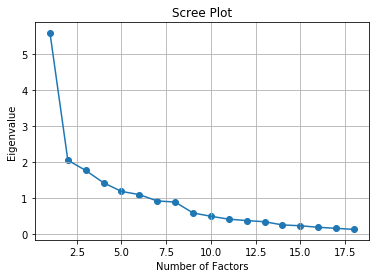

In [10]:
# Create scree plot
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
#plt.savefig(os.path.join(base_dir,'figures','scree_plot.png'), dpi=300)
plt.show()

# Perform factor analysis

In [11]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[ 8.12110216e-01,  1.02944039e-01,  1.89353830e-02,
         9.58180939e-02,  4.84769330e-02, -2.22746485e-02],
       [ 8.79194162e-01,  2.01763004e-01,  3.78379905e-02,
         5.65635981e-02,  4.57631727e-03,  5.31476503e-02],
       [-1.12540291e-01,  6.70448348e-02, -9.95896231e-03,
         5.90902264e-01, -4.49849234e-01,  3.33791143e-02],
       [ 2.85784009e-01,  7.84398401e-01,  1.94835004e-01,
         1.54948030e-01, -3.82556586e-02,  5.71581158e-02],
       [ 1.59901054e-01,  6.90075849e-01,  7.75616909e-02,
         1.29703876e-01, -8.22676824e-03,  4.34330911e-02],
       [ 2.13305604e-01,  2.73763674e-01,  1.73918372e-01,
        -9.71698253e-02, -1.66678572e-02, -3.68195901e-03],
       [ 1.16191925e-02, -3.26963252e-03,  2.04761511e-01,
         9.35573336e-02, -3.25660339e-01,  8.07921912e-02],
       [ 2.03759244e-01, -7.38320553e-04,  1.83242167e-01,
         7.17103996e-02,  8.35106308e-01, -1.60531478e-02],
       [ 6.38867405e-01,  4.32350411e-01,  3.912

In [12]:
loadings = pd.DataFrame(fa.loadings_)
loadings['item'] = pd.DataFrame(df.columns)
loadings = loadings.set_index('item')

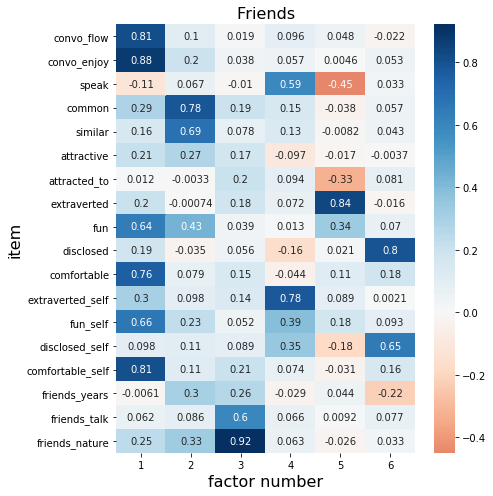

In [13]:
plt.figure(figsize=(7,7))
xticklabels = ['1', '2', '3', '4', '5', '6']
ax = sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, xticklabels=xticklabels)

plt.title('Friends', fontsize=16)
plt.xlabel('factor number', fontsize=16)
plt.ylabel('item', fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'Figures', 'factor_loadings_friends.png'), dpi=300)

In [14]:
fa.get_factor_variance()
# SS Loadings
# Proportion Variance
# Cumulative Variance

(array([3.91734871, 1.70814282, 1.52607018, 1.35826343, 1.21528932,
        1.20419204]),
 array([0.21763048, 0.09489682, 0.08478168, 0.07545908, 0.06751607,
        0.06689956]),
 array([0.21763048, 0.31252731, 0.39730898, 0.47276806, 0.54028414,
        0.60718369]))

# Get scores per convo

In [15]:
scores = fa.transform(df)
factor_loadings = pd.DataFrame(scores)
factor_loadings.columns = ['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5', 'factor_6']

In [16]:
data = pd.read_csv(os.path.join(base_dir, 'Data', 'post_convo_survey',
                              'friends', 'clean_data.csv'))

In [17]:
data_with_factors = pd.concat([data, factor_loadings], axis=1)

In [18]:
data_with_factors.to_csv(os.path.join(base_dir, 'Analyses',
                              'post_convo_survey_with_factors_friends.csv'),
                        encoding='utf-8', index=False)

In [19]:
data_with_factors.head()

,subID,partnerID,convo_flow,convo_enjoy,speak,common,similar,attractive,attracted_to,extraverted,...,friends_years_extended,friends_talk,friends_nature,gender,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6
0,25,201,69,80,49,66,74,75,11,68,...,NaN,91,95,1,-0.308200,-0.087290,1.335019,-0.536253,0.328599,0.492113
1,201,25,83,85,62,89,62,98,85,69,...,NaN,95,75,1,-0.013250,0.356531,-0.653459,0.521183,-0.289183,-0.573040
2,30,202,96,97,58,95,100,86,60,92,...,NaN,100,91,1,0.092974,0.847730,0.713707,0.734823,0.552550,0.397309
3,202,30,77,82,50,76,31,74,75,68,...,NaN,73,67,2,-0.504380,-0.533086,-0.522414,0.178579,-0.091145,0.566868
4,101,203,92,99,56,62,78,80,26,59,...,NaN,51,52,2,0.334490,-0.254378,-1.423448,-0.758338,-0.482940,-0.538780


(array([ 2.,  0.,  2.,  1.,  0.,  8., 14., 13., 27., 63.]),
 array([ 25. ,  32.5,  40. ,  47.5,  55. ,  62.5,  70. ,  77.5,  85. ,
         92.5, 100. ]),
 <a list of 10 Patch objects>)

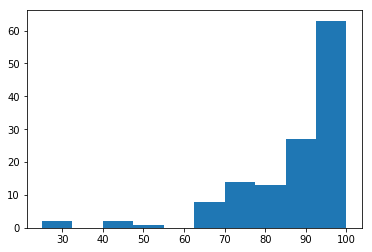

In [20]:
plt.hist(data_with_factors['convo_enjoy'])

(array([ 2.,  0.,  1.,  2.,  3., 13., 16., 28., 47., 18.]),
 array([-4.13089394, -3.58476124, -3.03862854, -2.49249584, -1.94636314,
        -1.40023045, -0.85409775, -0.30796505,  0.23816765,  0.78430035,
         1.33043305]),
 <a list of 10 Patch objects>)

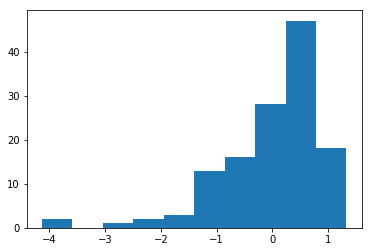

In [21]:
plt.hist(data_with_factors['factor_1'])